# Pytorch图像增广
图像增广在对训练图像进行一系列的随机变化之后，生成相似但不同的训练样本，从而扩大了训练集的规模，以此来训练更深层的神经网络。此外，应用图像增广的原因是，随机改变训练样本可以减少模型对某些属性的依赖，从而提高模型的泛化能力。例如，我们可以以不同的方式裁剪图像，使感兴趣的对象出现在不同的位置，减少模型对于对象出现位置的依赖。我们还可以调整亮度、颜色等因素来降低模型对颜色的敏感度。

这一节主要介绍利用pytorch对图像进行增广的集中常见方法。

## 常见的图像增广方法
我们以下面这个尺寸为$400\times 500$的图像作为示例。


In [7]:
import torch
import torchvision
from torchvision import transforms

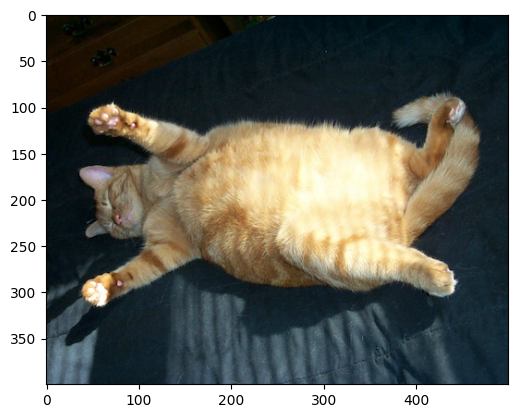

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
img = Image.open('./cat1.jpg')
plt.imshow(img)

### 将图像张量化：tansforms.ToTensor()
将PIL.Image或者numpy.ndarray类型的图片转为torch.Tensor类型，如果图片的灰度级在[0, 255]，会除以255.0，归一化到[0.0, 1.0]。这个基本上每个数据集都会用到。

In [16]:
tran = transforms.ToTensor()  # 实例化
tran(img), tran(img).shape

(tensor([[[0.0588, 0.0627, 0.0706,  ..., 0.0000, 0.0039, 0.0039],
          [0.0627, 0.0745, 0.0784,  ..., 0.0039, 0.0039, 0.0078],
          [0.0941, 0.0941, 0.0941,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2706, 0.2902, 0.3059,  ..., 0.0902, 0.0902, 0.0902],
          [0.2588, 0.2784, 0.3255,  ..., 0.0980, 0.0980, 0.0980],
          [0.2510, 0.2627, 0.3412,  ..., 0.0941, 0.0941, 0.0941]],
 
         [[0.0471, 0.0588, 0.0667,  ..., 0.0706, 0.0745, 0.0745],
          [0.0392, 0.0510, 0.0667,  ..., 0.0784, 0.0784, 0.0824],
          [0.0549, 0.0627, 0.0706,  ..., 0.0667, 0.0706, 0.0706],
          ...,
          [0.3451, 0.3647, 0.3804,  ..., 0.1647, 0.1647, 0.1647],
          [0.3412, 0.3529, 0.4000,  ..., 0.1725, 0.1725, 0.1725],
          [0.3333, 0.3451, 0.4118,  ..., 0.1608, 0.1608, 0.1608]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.1098, 0.1137, 0.1137],
          [0.0000, 0.0000, 0.0000,  ..., 0.1059, 0.1059, 0.1098],
          [0.0078, 0.0118, 0.0157,  ...,

### 灰度化：transforms.Grayscale()
将彩色图片转为灰度图片。图片必须是PIL.Image或torch.Tensor类。包含参数：
* `num_output_channels`：如果num_output_channels=1，返回单通道灰度图片；如果num_output_channels=3，返回三通道的灰度图片，其中r == g == b。一般我们不用设置，默认为1就行了。

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x16887825b80>)

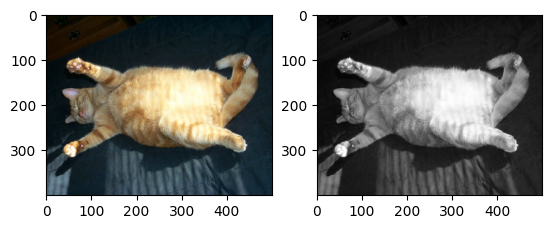

In [25]:
tran = transforms.Grayscale(num_output_channels=1)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img), cmap='gray')  
# 用matplotlib显示PIL灰度图像，要表明cmap='gray'

### 中心裁剪：transforms.CenterCrop()
对图片进行中心裁剪。中心就是图片高和宽二分之一的交点。图片必须是PIL.Image或torch.Tensor类型。包含参数:
* `size`：输出图片的高、宽。你可以给一个整型的数字，比如3，表示输出3x3的图片；你也可以给一个元组，比如(3, 5)，表示输出高为3，宽为5的图片。 

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x16889318c70>)

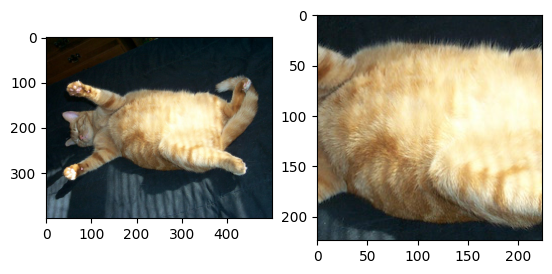

In [27]:
tran = transforms.CenterCrop(size=224)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img)) 

### 边缘拓展：transforms.Pad()
对图像边缘进行拓展填充。包含参数：
* `padding`：拓展宽度。如果是整型，则所有边都拓展；如果是二元组，则指定左右和上下的拓展宽度。如果是四元组，则指定左、上、右、下的拓展宽度。
* `fill`：像素填充的值，默认是0，代表黑色。可以指定整型，也可以用三元组表示分别填充RGB通道。

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1688958c910>)

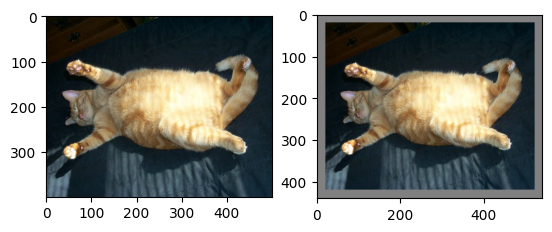

In [31]:
tran = transforms.Pad(padding=20, fill=128)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img)) 

### 随机裁剪：transforms.RandomCrop()
即在随机位置对图像进行裁剪,包含参数：
* `size`：输出图像的尺寸

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x168896fdb80>)

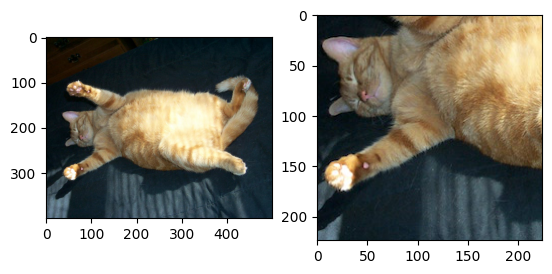

In [34]:
tran = transforms.RandomCrop(224)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img))

### 尺寸缩放：transforms.Resize()
调整图像的大小到指定尺寸。图像必须是PIL.Image或torch.Tensor类型。这个也用的比较多，训练是按批的，必须保证每批图像的尺寸是相同，所以一般都会在训练前进行resize操作。包含参数：
* `size`:可以输入一个元组，表示图像的高、宽。比如(300, 500)，返回高为300，宽为500的图片；也可以只输入一个整型的数字，**短边就是这个数字**，然后长边按照相同的长宽比进行调整。比如一张高、宽分别为400、500的图片，指定size =600，那么返回的图像高、宽分别是600、750。

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x16889791c40>)

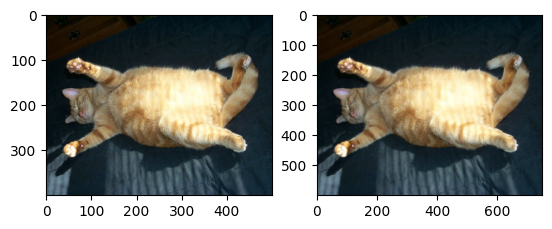

In [35]:
tran = transforms.Resize(600)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img))

In [37]:
tran(img).size

(750, 600)

### 随机裁剪缩放：transforms.RandomResizedCrop()
将原图片随机裁剪出一块,再缩放成相应的比例,包含的参数：
* `size`:输出图像的尺寸
* `scale`:裁剪原始图片面积的比例，是一个元组表示的区间
* `ratio`:裁剪区域的高宽比，也是一个元组表示的区间

比如[**随机裁剪**]一个面积为原始面积10%到100%的区域，该区域的宽高比从0.5到2之间随机取值。然后，区域的宽度和高度都被缩放到200像素。

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1688bc04fa0>)

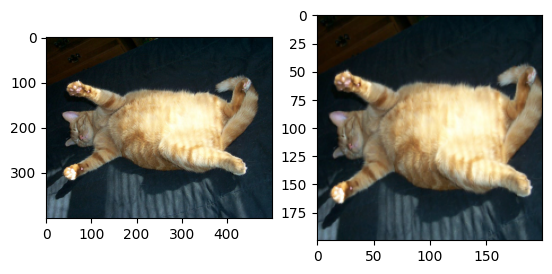

In [38]:
tran = transforms.RandomResizedCrop(
    size=(200, 200), scale=(0.1, 1), ratio=(0.5, 2))
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img))

### 随机水平翻转：transforms.RandomHorizontalFlip(p=0.5)
字面意思，就是水平翻转图像。不过是否翻转是随机的。p：水平翻转的概率，如果是1就一定翻转，如果给0就一定不翻转，如果其它值则按概率随机选择是否翻转。比如0.5，那么就有一半的可能翻转，一半的可能不翻转。图像必须是PIL.Image或torch.Tensor类型。

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1688bca0d60>)

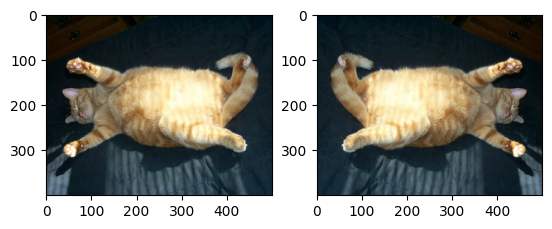

In [40]:
tran = transforms.RandomHorizontalFlip(600)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img))

### 随机垂直翻转：transforms.RandomVerticalFlip(p=0.5)
垂直随机翻转，翻转的概率为$p$。

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1688bd37a00>)

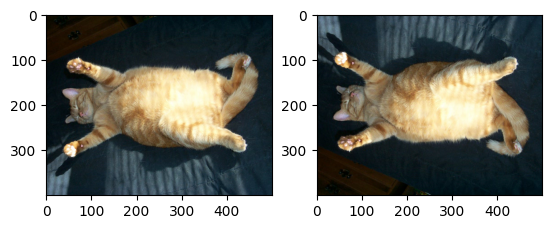

In [41]:
tran = transforms.RandomVerticalFlip(600)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img))

### 高斯模糊：transforms.GaussianBlur()
* `kernel_size`：模糊半径。必须是奇数。
* `sigma`：正态分布的标准差。如果是浮点型，则固定；如果是二元组(min, max)，sigma在区间中随机选取一个值。

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1688e8ff6a0>)

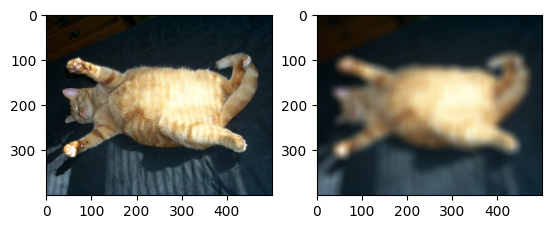

In [53]:
tran = transforms.GaussianBlur(kernel_size=21, sigma=40)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img))

### 改变颜色
随机更改图像的亮度（`brightness`）、对比度（`contrast`）、饱和度（`saturation`）和色调（`hue`）。

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1688e90ffa0>)

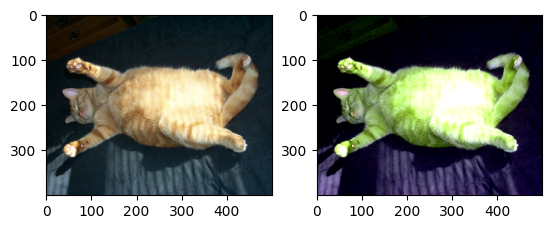

In [54]:
tran = transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(tran(img))

## 图像增广方法的组合：transforms.Compose()

通过使用一个`Compose`实例来综合上面定义的不同的图像增广方法，并将它们应用到每个图像。

In [55]:
trans = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])

In [60]:
trans(img).shape

torch.Size([3, 224, 224])

将tensor类型的图像转化为PIL类型的图像：

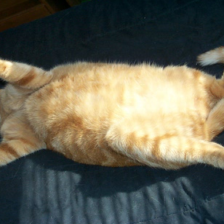

In [61]:
tran = transforms.ToPILImage()
tran(trans(img))

## 小结
* 图像增强有利于扩大图像数据集，训练更大的模型；也可以降低模型对图像某些特征的依赖，比如位置、颜色等。
* torchvision.transforms提供了多种类型的图像增强方法
* 定义图像增广方法组合之后，可以将其用于数据集的加载过程，得到训练需要的图像数据。